In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

## Define Functions

In [12]:
def flatten(V):
    try:
        return np.concatenate(V.to_numpy())
    except:
        return V.to_numpy()

def bar_input(V, cutoff = 0):
    uniques, counts = np.unique(V, return_counts=True)
    uniques, counts = uniques[counts > cutoff], counts[counts > cutoff]
    return uniques, counts

In [13]:
def plot_durations(X, log = True):
    # durations
    durations = X['total_duration']
    min_duration = min(durations)
    max_duration = max(durations)
    durations_sum = sum(durations)
    bins = np.arange(min_duration, max_duration, (max_duration - min_duration)/30)
    if log:
        bins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(durations, bins=bins)
    if log:
        plt.xscale('log')
    plt.title('Durations')
    plt.show()
    print(f'min duration = {min_duration} sec, max duration = {max_duration} sec,')
    print(f'mean = {durations_sum / len(durations)} sec, sum = {int(durations_sum // 3600)} h {int(durations_sum % 3600 // 60)} min')
    
def plot_programs(X):
    programs = flatten(X['programs'])
    uniques, counts = bar_input(programs)

    instruments = ['Piano', 'Chromatic Percussion', 'Organ', 'Guitar', 'Bass', 'Strings',
                   'Ensemble', 'Brass', 'Reed', 'Pipe', 'Synth Lead', 'Synth Pad', 'Synth Effects',
                   'Ethnic', 'Percussive', 'Sound Effects']
    inst_counts = {i:0 for i in instruments}

    for unique, count in zip(uniques, counts):
        i = (unique-1)//8

        if i == -1:
            inst_counts['None'] = count
        else:
            inst_counts[instruments[i]] += count

    for i in instruments:
        if inst_counts[i] == 0:
            del inst_counts[i]

    fig1, ax1 = plt.subplots()
    ax1.pie(inst_counts.values(), labels=inst_counts.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    plt.show()

def plot_tempos(X, cutoff = 10):
    tempos = flatten(X['tempo'])
    uniques, counts = bar_input(tempos, cutoff)
    plt.bar(uniques, counts)
    plt.title('Tempos')
    plt.show()
    print(f'min tempo = {min(tempos)}, max tempo = {max(tempos)}')

def plot_n_tracks(X, cutoff = 10):
    n_tracks = flatten(X['n_tracks'])
    uniques, counts = bar_input(n_tracks, cutoff)
    plt.bar(uniques, counts)
    plt.title('Number of tracks')
    plt.show()
    print(f'min n_tracks = {min(n_tracks)}, max n_tracks = {max(n_tracks)}')

def plot_drums(X):
    drum = sum(X['uses_drum'])
    no_drum = len(X['uses_drum']) - drum

    labels = 'Drums', 'No Drums'
    sizes = [drum, no_drum]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

def plot_silent(X, q=0.5):
    p_silent_start = X['silent_start']/X['len']
    cutoff = np.quantile(p_silent_start, 0.5)
    plt.hist(p_silent_start[p_silent_start < cutoff + 1e-8], bins=30)
    plt.title('Percentage silent frames start')
    plt.show()
    print(f'min p_silent_start = {min(p_silent_start)}, max p_silent_start = {max(p_silent_start)}')

    p_silent_end = X['silent_end']/X['len']
    cutoff = np.quantile(p_silent_end, 0.5)
    plt.hist(p_silent_end[p_silent_end < cutoff + 1e-8], bins=30)
    plt.title('Percentage silent frames start')
    plt.show()
    print(f'min p_silent_end = {min(p_silent_end)}, max p_silent_end = {max(p_silent_end)}')

    p_silent_middle = X['silent_middle']/X['len']
    cutoff = np.quantile(p_silent_middle, 0.5)
    plt.hist(p_silent_middle[p_silent_middle < cutoff + 1e-8], bins=30)
    plt.title('Percentage silent frames during song')
    plt.show()
    print(f'min p_silent_middle = {min(p_silent_end)}, max p_silent_middle = {max(p_silent_end)}')

def plot_dist_notes(X):
    notes_in_bin = X['notes_in_bin']

    avg_notes_per_bin = np.zeros(128)
    for notes in notes_in_bin:
        if sum(notes) > 0:
            avg_notes_per_bin += np.array(notes)/sum(notes)
    avg_notes_per_bin /= len(notes_in_bin)

    plt.bar(range(1, 129), avg_notes_per_bin)
    plt.title('Average distribution notes')
    plt.show()

In [14]:
def plot_all(file_name):
    with open(file_name, 'r') as f:
        X = json.load(f)
    X = pd.DataFrame(X).T
    
    print(f'Data set: {file_name}')
    print(f'Number of songs: {len(X)}')

    # resolutions
    resolutions = X['resolution'].unique()
    print('Resolutions:', *[f'{r} (number of songs '+str(len(X[X['resolution'] == r]))+')' for r in resolutions])
    
    plot_durations(X)
    plot_programs(X)
    plot_tempos(X)
    plot_n_tracks(X)
    plot_drums(X)
    plot_silent(X)
    plot_dist_notes(X)

## Plots

Data set: all_data_maestro.json
Number of songs: 29062
Resolutions: 24 (number of songs 29062)


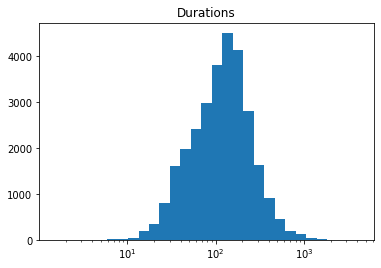

min duration = 1.5 sec, max duration = 4316.7631519999995 sec,
mean = 154.2305397387776, sum = 1245.0 h 4.0 min


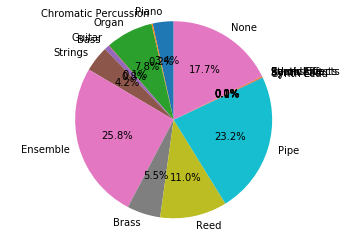

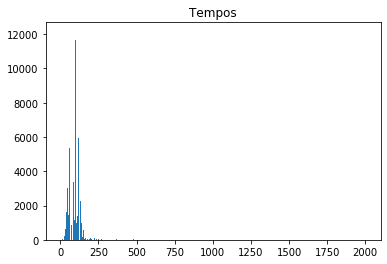

min tempo = 1, max tempo = 62836


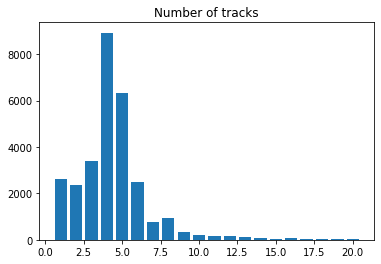

min n_tracks = 1, max n_tracks = 39


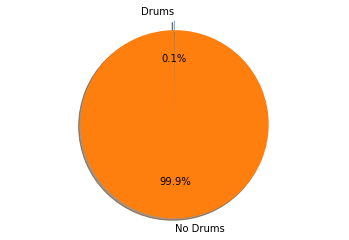

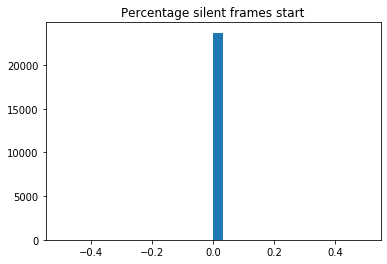

min p_silent_start = 0.0, max p_silent_start = 0.32883435582822085


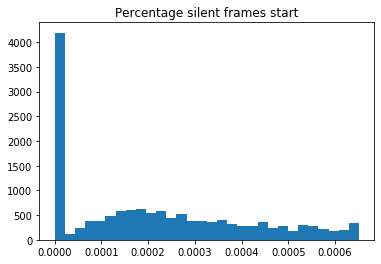

min p_silent_end = 0.0, max p_silent_end = 0.9818425076452599


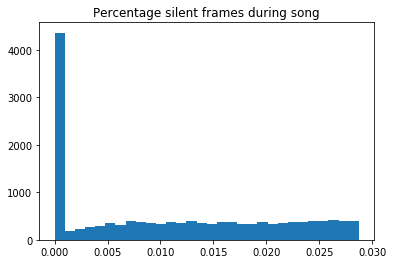

min p_silent_middle = 0.0, max p_silent_middle = 0.9818425076452599


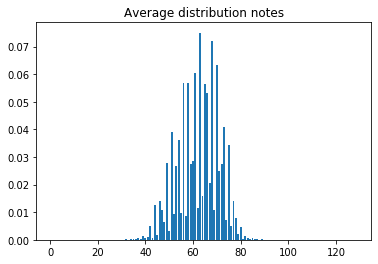

In [15]:
plot_all('all_data_maestro.json')

In [ ]:
plot_all('all_data_cpdl.json')

In [ ]:
plot_all('all_data_maestro.json')

In [ ]:
plot_all('all_data_kunstderfluge.json')

In [ ]:
plot_all('all_data_mfiles.json')

In [ ]:
plot_all('all_data_midiworld.json')